# Artificial Neural Networks

----------------------------------

Below is a detailed explanation of artificial neurons, perceptrons, and multi-layer perceptrons. The reader is expected to have some knowledge about machine learning prior to reading this, but also be not too familiar with neural networks. The reader should after this notebook see the one regarding *computational graphs in deep learning* to get a practical and theoretical understanding of deep learning frameworks. 

----------------------------------


## Biological neurons

The first computational model of an *artificial neuron* was proposed by McCulloch \& Pitts way back in 1943. It still serves as the basis for almost all modern day artifical neural networks (ANN). The McCulloch \& Pitts model took more of a biological approach to learning, and strived to mimick the functionality of a biological neuron. Extremely simplified, the biological neuron consists of four main components: 
- *dendrite*, branched extensions of a nerve cell, receives signals from other neurons in form of chemically induced potentials,
- *soma*, the cell body processing the received information,
- *axon*, nerver fiber which transmits the output of the soma,
- *synapse* is the point of connection to other neurons.

Generally, and somewhat biologically inaccurate, the process for the neurons in our brain is that the dendrites receive output from either another neuron or some stimuli, the soma processes it and transmits its calculated response to other neurons if it is *activated*. Ofcourse, this process is happening in billions of neurons in parallel, and potentially in a hierarchical systematic manner. This ensures that there is a divion of labor so to say, i.e. each neuron only activates when its inherent criteria is met, for example an amount of potential being received. A schematic image of a neuron can be seen below.
![neuron_schematic](../images/neuron.png)

## Artificial neurons

Reconnecting to the computational model proposed by McCulloch \& Pitts, the biological neuron is simplified to the *artificial neuron*. Here, the dendrites are represented as input values to the soma, and the axon is the output of the processed input by the soma. In modern day this mathematical discriminator is referred to as a *perceptron*, and can be used in supervised learning contexts. The perceptron comprises two main components:
- $g$, aggregates the input values which represent excitatory postsynaptic potentials and inhibitory postsynaptic potentials at neural dendrites,
- $\sigma$, activation function applied to the aggregated response $g$, based on value of $f$ either activates or not.

Since the activation function $\sigma$ of the perceptron either activates the neuron or not, it can be viewed as a binary classifier. Each input to the neuron has an associated weight, deciding how much each input should contribute to the activation of the neuron. This old-school perceptron has been modified in modern day machine learning paradigms with alternative activation functions $\sigma$ that allow for continuous output values. Anyway, the perceptron can be formally defined as

>$\large g = \sum_i x_i\cdot w_i$

>$\large \hat{y} = \sigma(g)$

where $x$ are the inputs, $w$ are the weights, and $\hat{y}$ is the *predicted* activation response. I say predicted here, because in a supervised learning context we know what the response should be and can tweak the neurons weights if it activates incorrectly. This artifical neuron can conceptually be reconnected to its biological counterpart by the following image.
![artificial neuron](../images/artificial_neuron.png)

-------------
## Single-layer perceptrons
Utilizing only a single perceptron is not as common today. A single perceptron is only capable of correctly performing classification on a *linearly-separable* dataset. What this means is that there are two classes in the dataset which distinctly can be separated by a single line. This might seem extremely limiting to you, and that would be correct. So how can we utilize the perceptron to work on more challenging tasks, like classifying on data that is not linearly separable like the *xor* operation? 


### Linearity
Your first idea might be to introduce more perceptrons, and that is exactly what you would do. However, one has to do this with great care. Summarizing several perceptrons is only meaningful if you introduce non-linear activation functions. Otherwise, the contribution of all linear perceptrons can be summarized as a single perceptron. Lets visualize this with the below example (omitting the activation function $\sigma$). 

![perceptrons](../images/perceptrons.svg)

The above graph represent our three perceptrons that work on the input $x$ to produce the output $y$. Here I also introduce the bias term $b_i$ that is commonly used in perceptrons. Mathematically this can be written as

>$\large g = x_1\cdot w_1 + x_2\cdot w_2 + b_1$

>$\large f = x_3\cdot w_3 + x_4\cdot w_4 + b_2$

>$\large y = g + f + b_3$

Everyone can see that it does not matter what $f$ or $g$ does individally, as all of the operations on the input data can directly be expressed at $y$ accordingly

>$\large y =  x_1\cdot w_1 + \dots + x_4\cdot w_4 + b_1 + b_2 + b_3 $

and if we were to introduce an activation function $\sigma$ to the output $y$ we would get the resulting $\hat{y}$ that is our predicted class or value

>$\large \hat{y} = \sigma(y) = \sigma(x_1\cdot w_1 + \dots + x_4\cdot w_4 + b_1 + b_2 + b_3)$

What we see here is that we are fully capable of expressing the activation output *without* including the intermediate results $g$ and $f$. Thus, the above graph can be represented by a single perceptron. However, introduce non-linear activation functions for $f$ and $g$ and we have to include these in the final expression for the activation output. What I shoved above is an example of a single-layer perceptron. We have perceptrons interacting directly with the input and output of the model, and those two *layers* subsequentially interact with each other, but no other layers are included.

### Updating the weights
The perceptron learning rule dictates the fashion for how the dendritic weights should be updated. There are several different learning rules that can be applied, but all follow the same approach. First, propagate your input $x$ across the perceptron, acquiring the predicted activation output $\hat{y}$. Given the real value to learn $y$, and a so-called *learning rate* $\eta$, we can calculate the weight update accordingly

>$\large \Delta w_i = -\eta(y - \hat{y})\cdot x_i $

Alternative learning methods usually build upon the concept of *gradient descent*, where the error expression $(y - \hat{y})\cdot x_i$ is substituted in favor for a loss function $\mathcal{L}$. The weight update is then found by calculating the gradient of the loss w.r.t the weight

>$\large \Delta w_i = -\eta\frac{\partial \mathcal{L}}{\partial w_i}$

There are multiple approaches to this gradient descent, often referred to as *optimizers* since they aim to optimize the weights of the perceptron. Some implementations like *SGD*, *Adam*, and *RMSProp* can be found implemented in the autograd library.

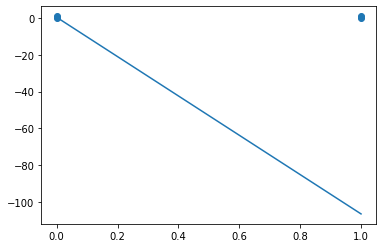

In [38]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

# our input data is going to be the 'NAND' logical gate
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]]).astype(np.float32).T
W = np.random.uniform(-1.0, 1.0, size=(1, 3))
y = [1.0, 0.0, 0.0, 0.0]

def forward(row, W, targets):
    activation = W[0, 0]
    for i in range(len(row) - 1):
        activation += W[0, i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0
        
lr = 1e-2
for _ in range(100):
    for row in range(X.shape[1]):
        preds = forward(X[:, row], W, y)
        error = y[row] - preds
        W[0, 0] += lr * error
        W[0, 1] += lr * error * X[:, row][0]
        W[0, 2] += lr * error * X[:, row][1]
    

bias = W[0, 0]
m = -bias/W[0, 1]
k = m/(bias/W[0, 2])
xx = np.linspace(0, 1, 100)
yy = k*xx + m

plt.scatter(X[0, :], X[1, :])
plt.plot(xx, yy)
plt.show()

## Multi-layer perceptrons
Introduce more layers of perceptrons in the model and you get what is called a multi-layered perceptron (MLP). Here, we have layers that do not directly interact with the input $x$ nor the output $y$ and is referred to as the latent space. The introduction of a latent space greatly increases the models capabilities of fine-tuning the perceptron weights. Furthermore, if the perceptrons does not create any cycles and a perceptron in layer $h_i$ interacts with all other perceptrons of the next layer $h_{i+1}$ then it is referred to as a feedfoorward neural network. Images of MLPs are often what you see if you google 'AI' or 'machine learning', but most of them visually explain quite well what is actually going on, as can be seen below.

![multi-layer perceptron](../images/mlp.jpg)

### Updating the weights
Updating the weights of a MLP is not as straightforward as for the single-layer counterpart. Now, since each neuronal output of an intermediate layer depends on the preceeding output we get inherent dependencies in our model. The way to update the weights is performed by means of the *backpropagation through time* (BPTT) algorithm. Starting at the output, we calculate the gradient of the loss with respect to all perceptron weights one layer at a time backwards. This is done while multiplying the output (gradient) of of the previous layer with the current layers gradient.

>$\large \Delta w_{i} = \eta\frac{\partial L}{\partial w_{i}}\cdot \hat{y}_{j}$

Since we iteratively are *multiplying* the gradients of each layer, if the gradient is smaller than 1 continually then the resulting gradient at the first layer will be extremely small, often close to 0. This is what is known as the *vanishing gradient* problem. Similarly can happen for large gradients, where it instead explodes throughout the layers. This is called *exploding gradient*. 